# ***Anime Reviews Web Crawler, Scraper and Database Builder***

- Written By: Robert Blindt
- Updated On: 11/20/2022
- Originally branched from : "mal-reviews-scraper" by Sang Chu (sangkchu on Github)

## **Project & Work Product Description**
- **Main Goals:** 
  - Learn Python application design, coding, and debugging tools (Spyder, Jupyter) for Data Analytics 
  - Get significant hands-on experience dissecting, debugging, updating, and refining an end-to-end webscraping application
  - Learn many popular Python packages (Beautiful Soup, Selenium, Requests, Logging, others)
- **Secondary Goals:**
  - Learn Pandas for data wrangling and SQL databases for persistent storage
  - Learn key technologies used in web application development (HTML, CSS, Javascript, Selenium Webdriver)
- **Main Deliverables:** 
  - Strong hands-on skills and knowledge used to analyze, debug, and fix code problems in existing applications
  - Working code for the updated website crawler, scraper, and database builder
  - Lessons learned about the design and maintenance of *fault-tolerant* data scraping applications

##### Project Overview Flow Chart :

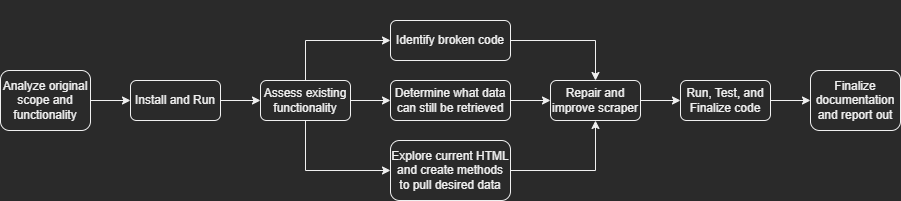


## Description of Solution:
This application uses both BeautifulSoup and Selenium to find and parse data, and then uses SQL to store and manage the database.  There is also a short script that employs Seaborn and Matplotlib to display data.  (That script is from the original project, but has some markups from me learning what was going on)

##### High level solution design block diagram :
The majority of my work was done in the Data Capture and Wrangling blocks. Improvement to the Data Analytics and Reporting would be desirable for marketability.

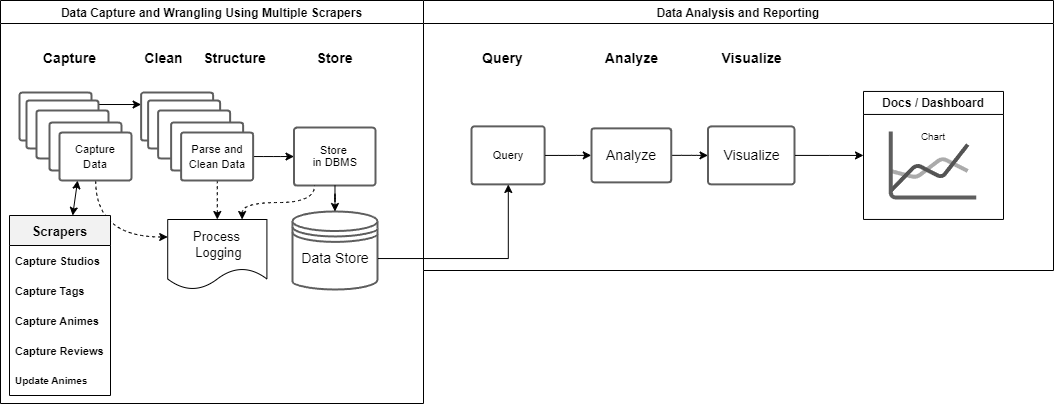

## Solution Design (high-level):
- **Initial Data Capture** (parse) and **Database Build and Data Storage**:
  - Capture the Studio ID Numbers and Studio Names from Studio page.
  - Capture the Genre and Theme Names and ID Numbers
  - Crawl and store the "Genre specific" Animes pages to retrieve the Anime IDs and other useful data
  - Crawl and store the user reviews pages to retrieve review content
- **Database Update** (Capture Recently Added Data):
  - Query and compare each scraper starting page ("latest") for changes to the key identifiers to decide which scrapers to invoke
    - Retrieve Studio ID Numbers and Names from Studios page; compare with database to identify new Studios
    - Retrieve the Genre and Theme Names and ID Numbers; compare with database to identify new Genres and Animes
    - Retrieve the most recent Anime ID; compare with database to identify if crawl is needed
    - Retrieve the most recent Review ID; compare with database to identify if crawl is needed
  - Call the required scrapers

### Solution Code Description: 
Data capture is achieved using a mix of BeautifulSoup (BS4) and Selenium.  The initial project exclusively used BS to scrape the site, but many elements on the site have moved or changed since the scraper was first completed in 2019.  Many user-related website interactions used dynamic Javascript, so the static BS4 parser could not be used.  For that reason, I integrated Selinum web automation functions to perform dynamic data requests.

### Main function Caller
- `main.py`

### Application structure and functions       
The "main()" application program uses the two following modules:
- `initial_scrape_all.py`
- `database_update_check_and_update.py`

The two main application modules call functions within these modules:
- `rb_custom_logger.py` - Custom logger used throughout to track progress and debug issues.
- `make_database.py` - Gets user input to create or select the database 
- `sql_queries.py` - Python SQL query commands to build tables, read, and insert objects into the database
- `useful_functions.py` - Utility functions (round_up(), round_down())
- `scrape_studios.py` - Scrapes and captures Studio objects into database
- `scrape_tags.py` - Scrapes and captures Tag objects (metadata for animes, genres) into database 
- `scrape_animes.py` - Scrapes and captures Anime objects into database (inital data capture)
- `scrape_reviews.py` - Scrapes and captures Review objects into the database
- `update_animes_scrape.py` - Scrapes and captures new animes to database (used after the initial pool of animes is captured)

A few basic statistics were provided in the original project that I ran to ensure that the database was properly created.  These are in `anime_stats_v0.py`.  There are not functions, but short console commands to ensure the database is functional. 

#### Tag and Studio Data Capture 
- The Studio and Tag scrapers use a single-page "scrape" with no JavaScript or AJAX interaction required.  This process is straight forward and uses BS4. 
    - The process taken was to identify the best CSS selector methods to get to the required data blocks in a controlled way.  
        - Due to the inconsistencies of the term 'tag' on the website, I took both the 'Themes' and 'Genres' as possible tags while only scraping the genres section of the website.  Some Animes would have thrown errors if Themes-tags for animes were not captured.  
        - There is a small subset of animes that only have themes, but there is not much information nor reviews for those animes.

##### Tag Scraper Starting Page :
The highlighted boxes represent containers and subcontainers - (https://myanimelist.net/anime.php) 

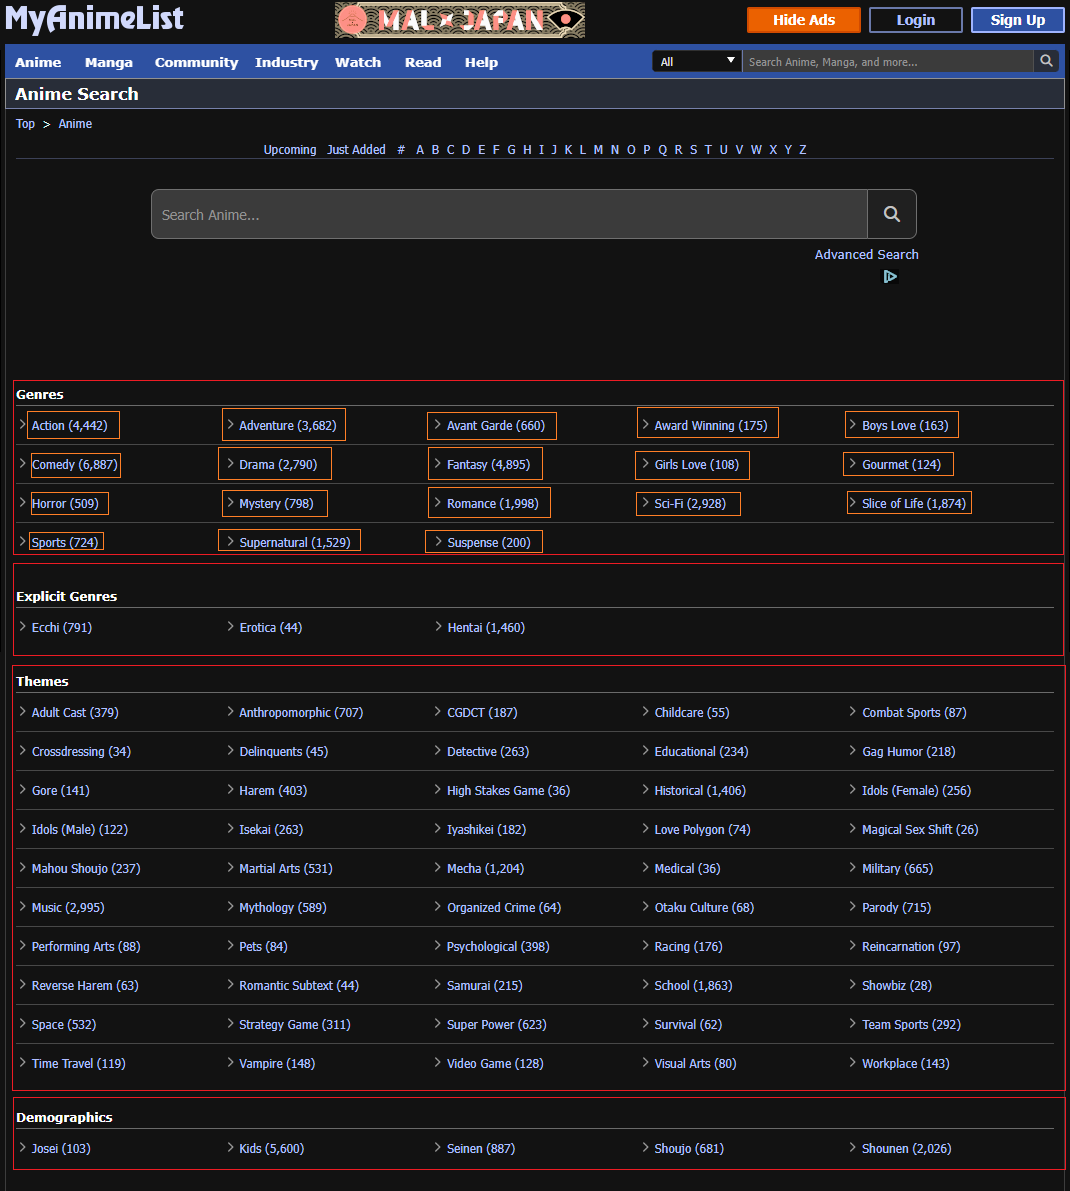

##### High level single page scrape flow chart :
Parsable format is a BS4 soup object

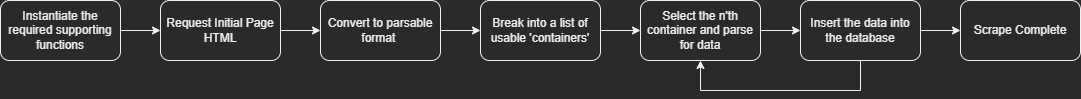

#### Animes Data Capture 
The Anime scraper crawl isn't much more complicated in comparison to the prior two scrapers, it just has to iterate across a set of pages to get the data it needs.  Just like the first two scrapers, the initial page used in the scraper obtains a list of genre names and ID numbers.  Most of this information could be queried out of the database at this point but you have to ensure that you don't change any aspect them to recreate the URL correctly, and we would then be missing the quantity of animes in each genre.  This quantity is used to iterate through the pages in genres.  From the Genre-specific iterable pages, it is once again just breaking down each anime container into sub-containers that need to be parsed.   

##### Anime Scraper Starting Page :
The highlighted containers represent containers and subcontainers - (https://myanimelist.net/anime.php) 

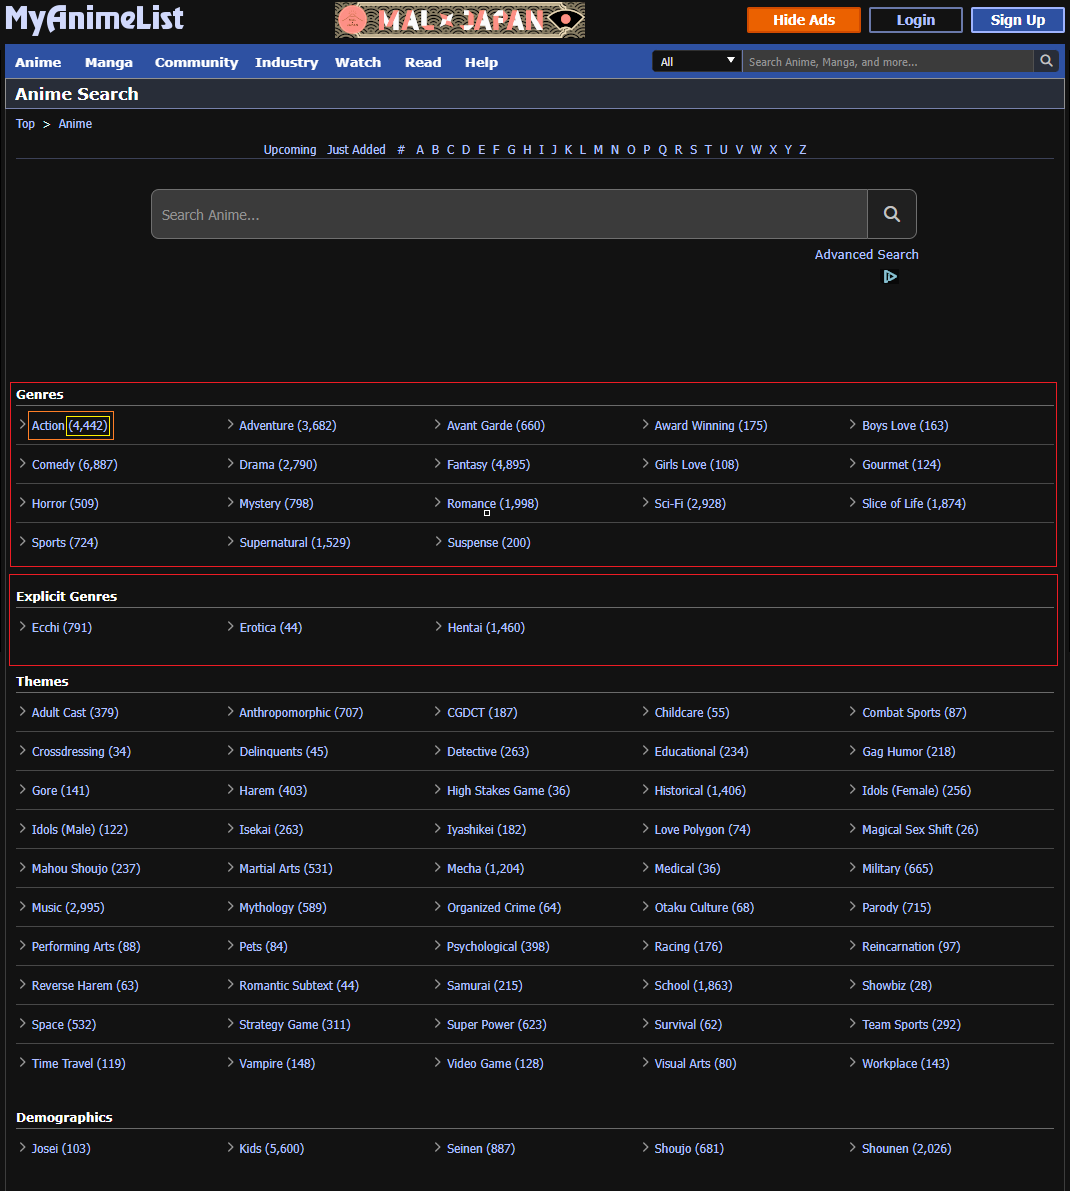

##### Animes Scraper Iterating Page URL Format :
The red annotations in the diagram below show the usage of genre tag_id, tag_name, and page count in the URL.

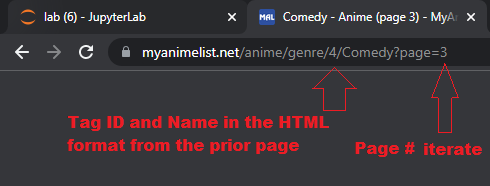

##### Animes Scraper Iterating Page :
The highlighted boxes represent containers and subcontainers - (https://myanimelist.net/anime/genre/1/Action?page=1) 

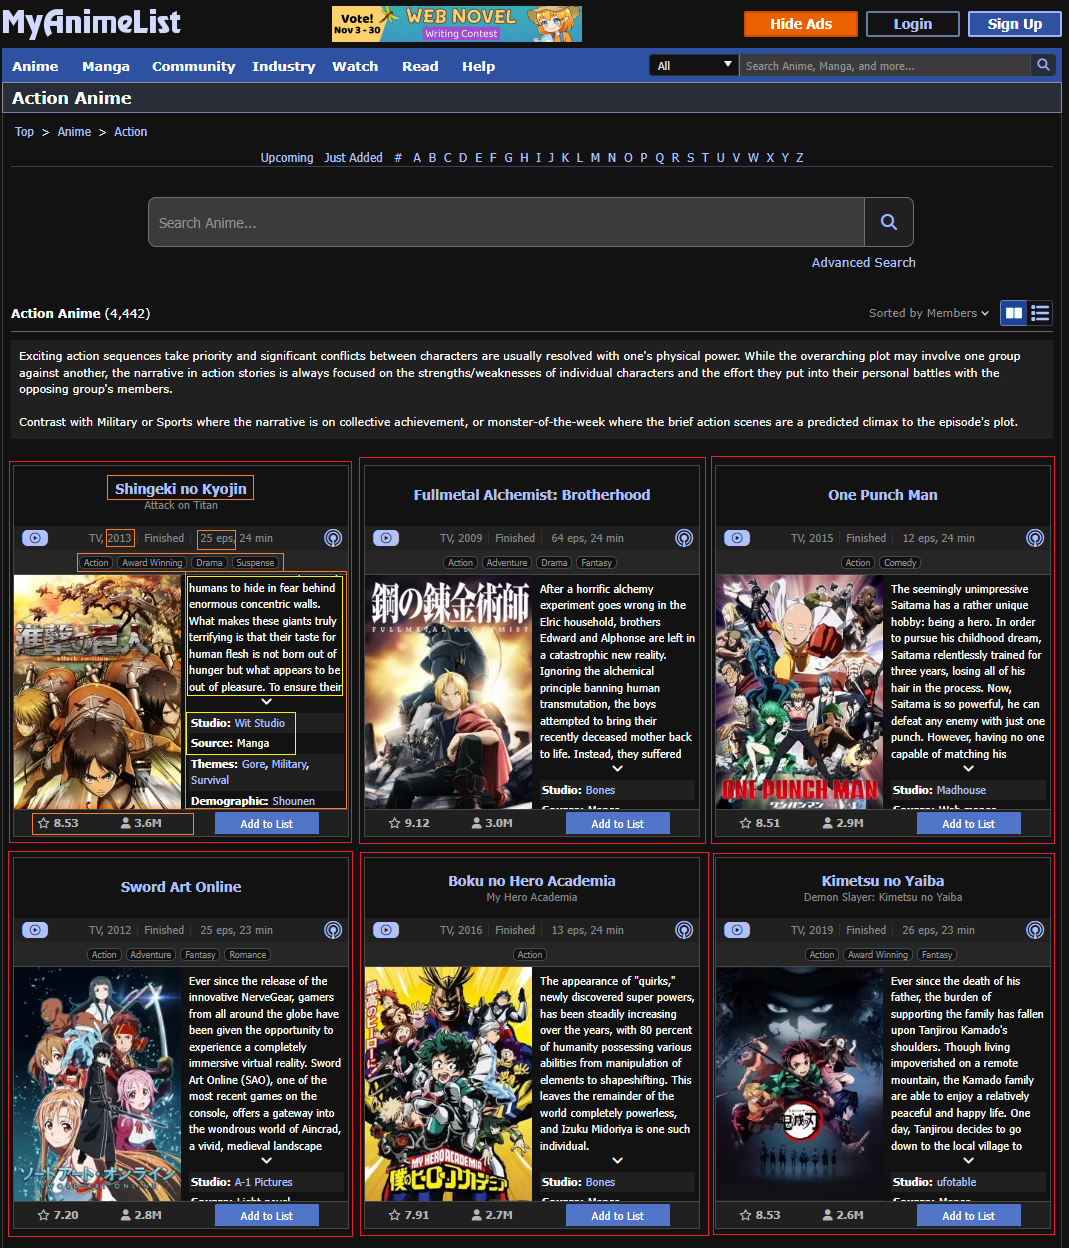

##### High level multi-page scraper flow chart used for scraping the animes :
Parsable format is a BS4 soup object

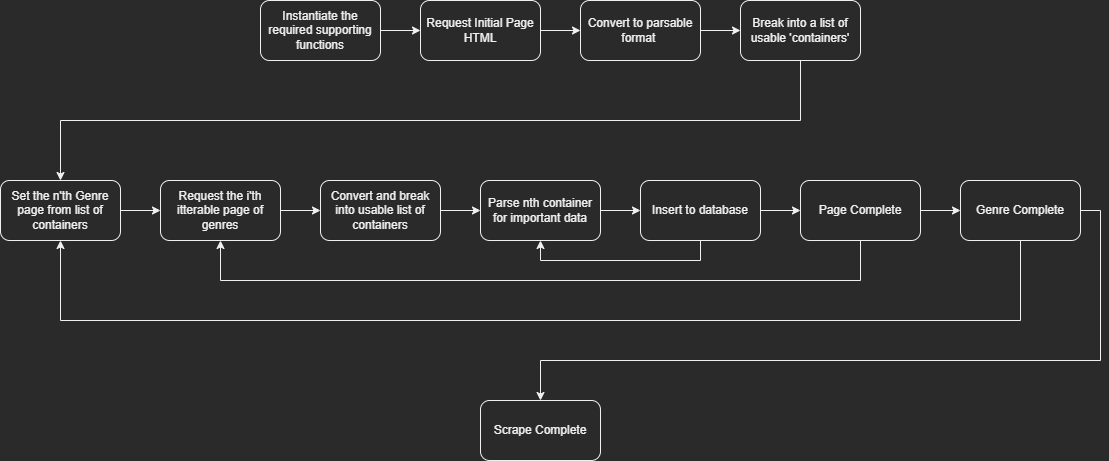

#### Reviews Data Capture 

The Review scraper uses Selenium because the required data object, "helpfulness", would not appear in the inital BS4 request.  It appeared that it was populated using a dynamic Javascript element that would sometimes load slowly or not at all during the initial Selenium request.  Implicit and explicit waits were used to compensate for these failures.  Additionally many of the older review pages sometimes would encounter 504 errors; these review pages would immediately load as soon as the page was resubmitted.  To handle this I used a try/except block to just resubmit the same get and find lines.  Note that everything on these pages are visiable in the HTML even when collapsed. 
        

##### Reviews Scraper Iterating Page :
The highlighted boxes represent containers and subcontainers - (https://myanimelist.net/reviews.php?t=anime&p=1) 

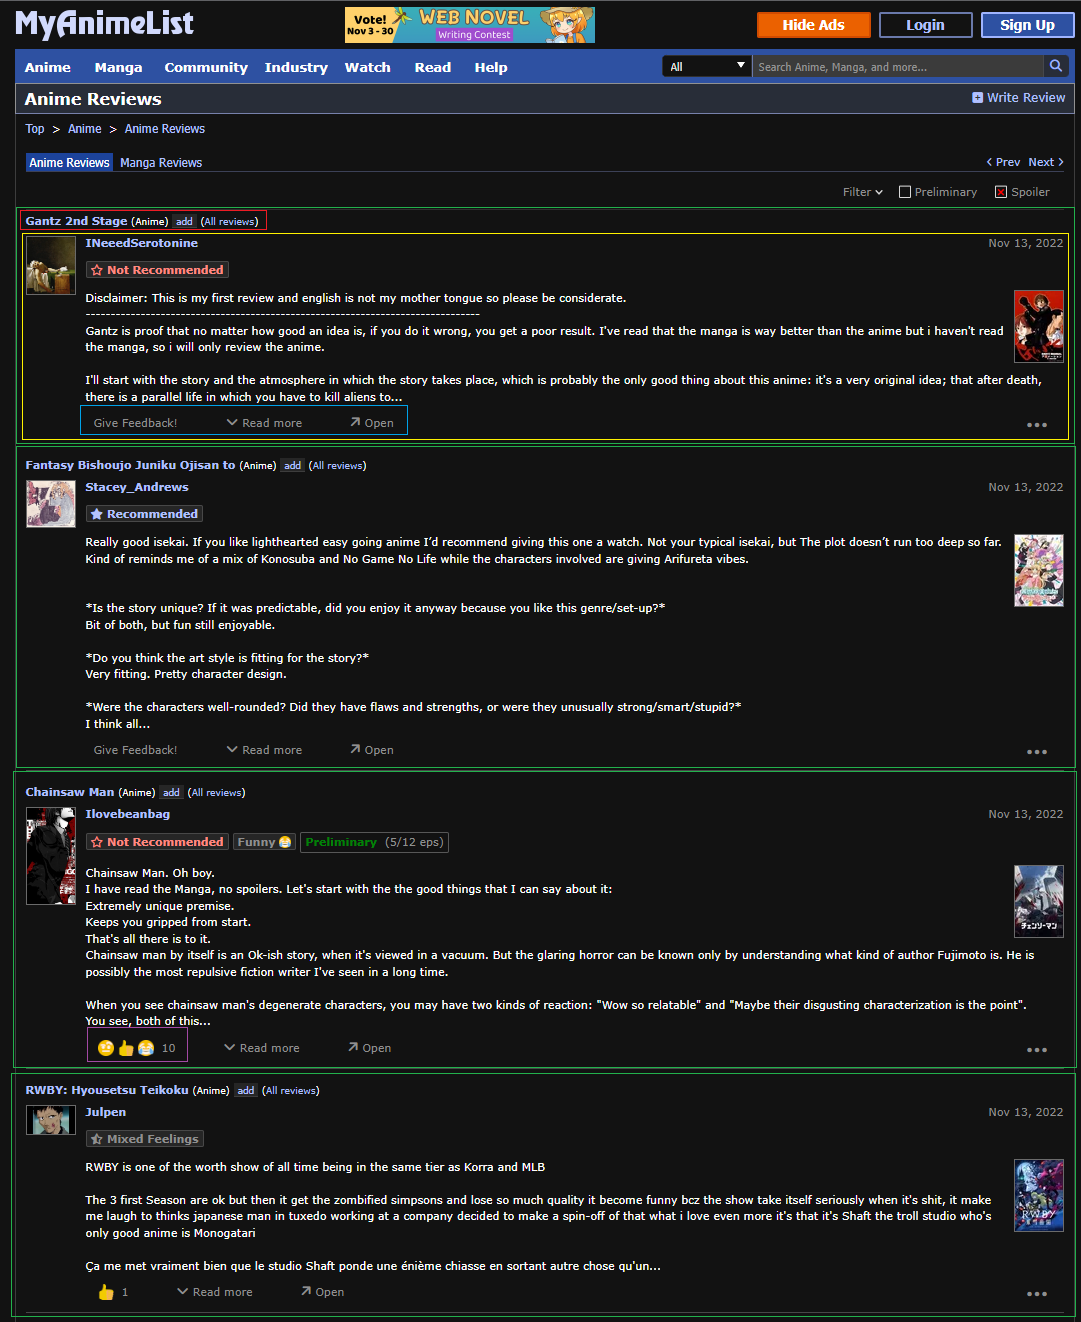

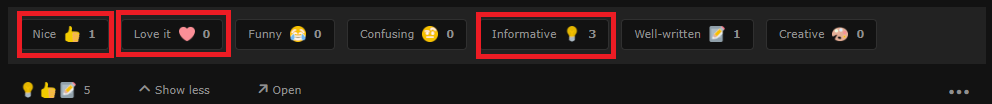

##### Review Scraper Iterating Page URL Format :
The annotation show the use of the element used to iterate through the pages of reviews.

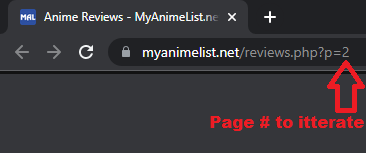

##### High-level multi-page scraper flow chart used for scraping reviews :
Python object is a Selenium webdriver

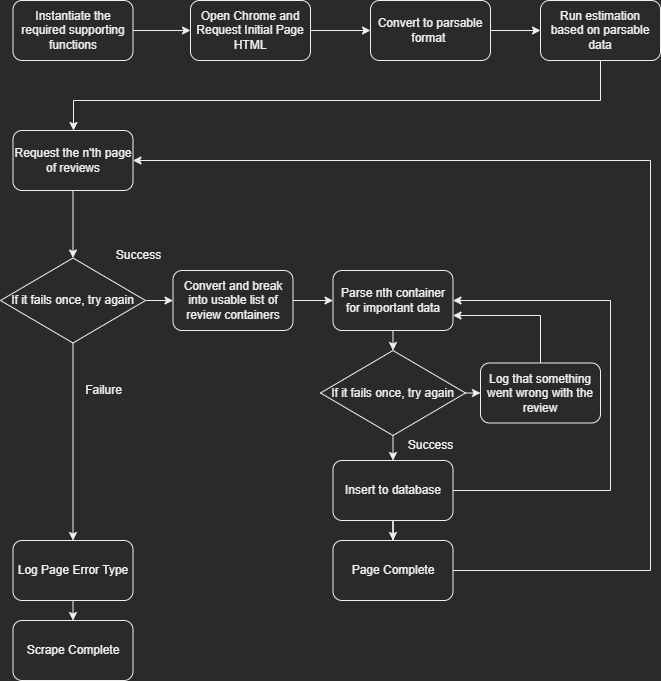

#### **Database Update**: 

The `update_animes_scraper()` uses BS to crawl the "just added" pages of animes.  It then opens each page of 'recently added animes' to capture the information it needs.  This is almost identical to the original scraper, but iterates over newly-added pages -- identified in the secondary scan -- to retrieve and store new data into the database.     
    

##### Update Animes Scraper Iterating Just-Added Page :
The highlighted boxes represent the containers that are turned into a list to iterate to each Animes page - 
(https://myanimelist.net/anime.php?o=9&c%5B0%5D=a&c%5B1%5D=d&cv=2&w=1&show=0)

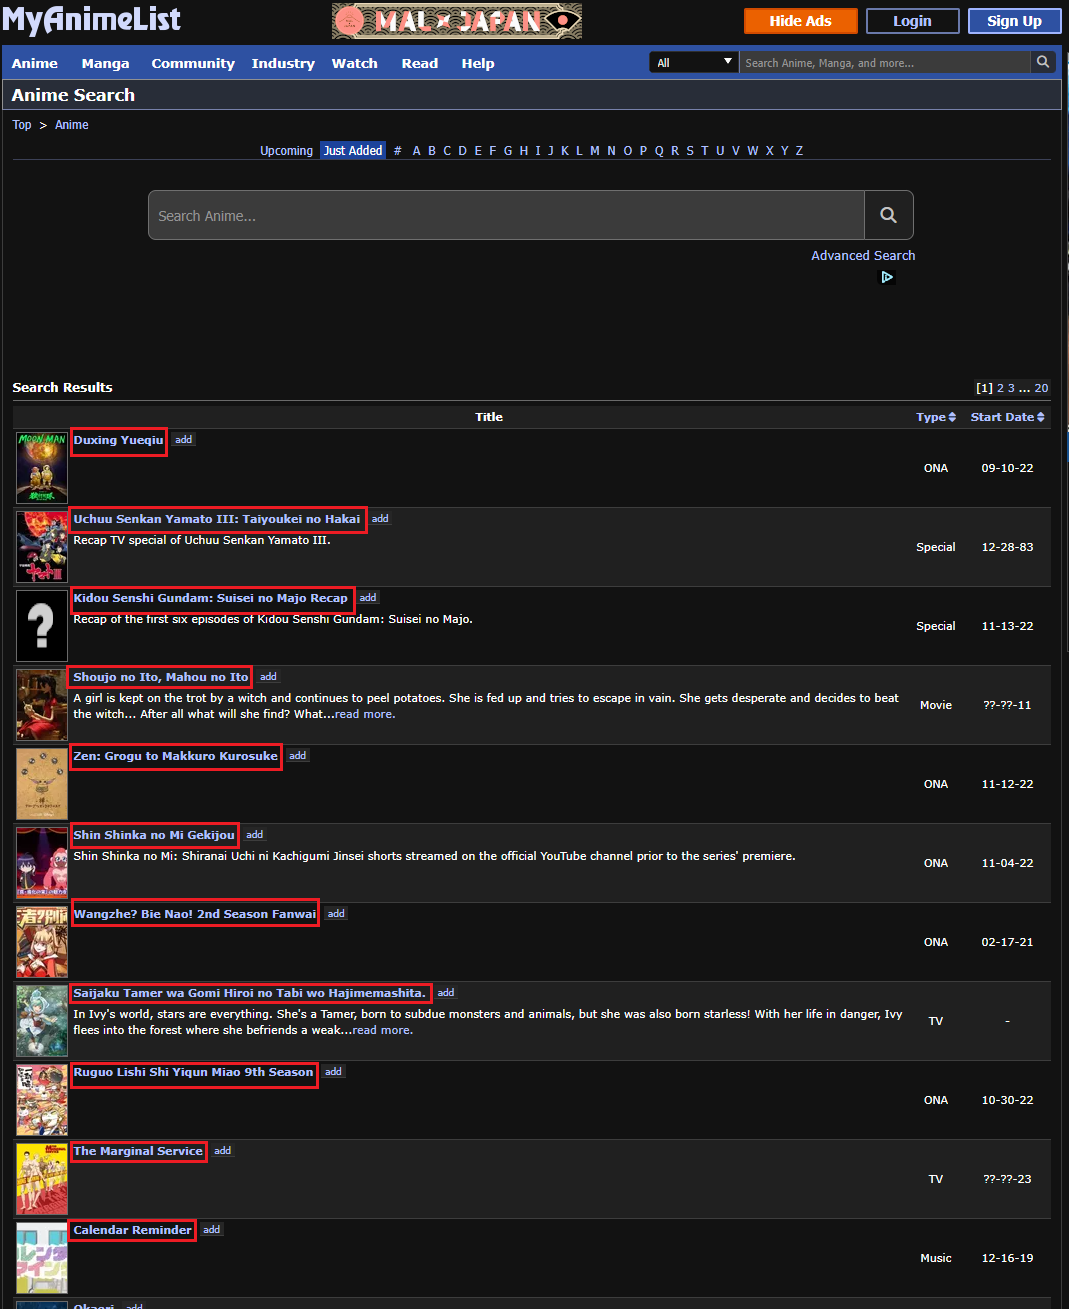

##### Update Animes Scraper Iterating Animes Page :
The highlighted boxes represent containers and subcontainers - (https://myanimelist.net/anime/{anime_id}/{anime_name}) 

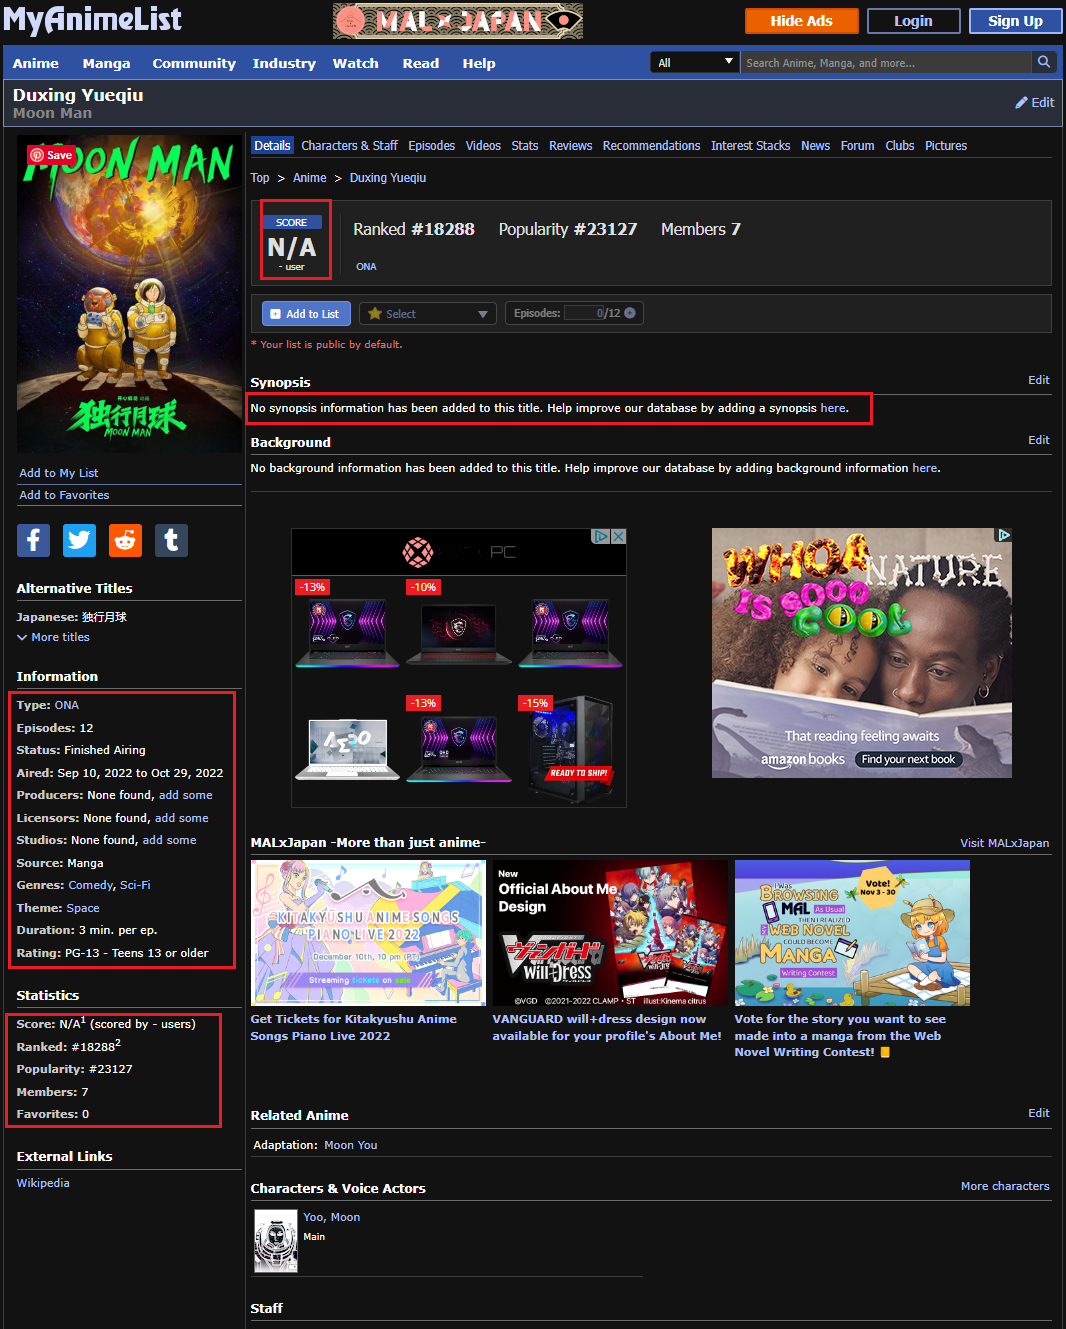

##### High level multi-page scraper flow chart used to update the database of animes :
Parsable format is a BS4 soup object

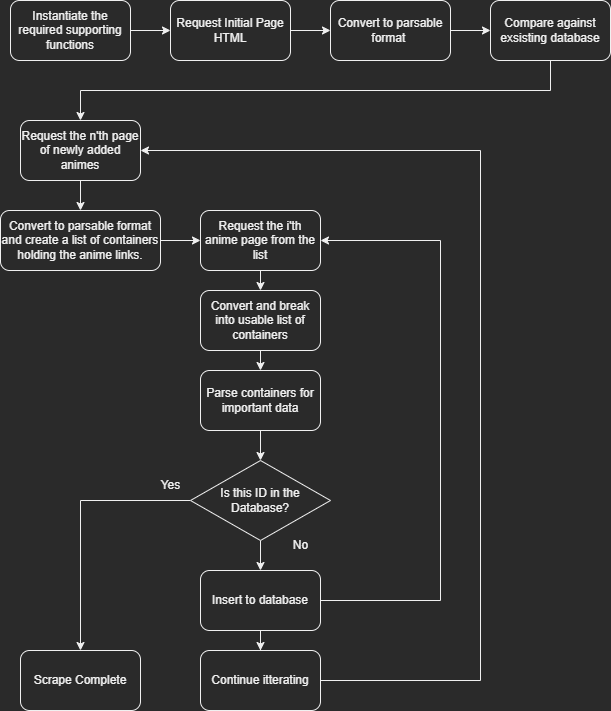

## Application Use: 
- Open 'main.py'
    - Run the imports and function definition
    - Run the line "main()"
        - It will ask you if you would like to do an intial scrape or an update.  It will also give you a quit option.  Once selected you will have to enter the name of the database you would like to create or interact with.  From there it should run completely hands off until it has completed its initial scrape.

### Application Use - ***Tips & Tricks***:   

- The custom logging function that I made can be used to quickly adjust logging levels in the scripts.  You can quickly change the level of logger calls by using the Ctrl+R and then searching for the term "level='DESIRED_NUMBER'". This could be turned into a variable in the function call if you want the logging level accessed in the final function caller.

- To change the logger name:
    - Open 'initial_scrape_all.py' or 'update_scrape.py'
    - Chang the output logging file name to the new destination.
    - Resave the scraper file.    

## Installation:
    1) Create a new Environment with python 3.8 or 3.9 (the two environments tested in)
    2) Install Spyder and any other programs you like to have in your environment (jupyter, command line utilities, etc)
    3) pip install pandas
    4) pip install selenium
    5) From here, use the steps in "Application Use" to run the scrapers

## Future Enhancements:
- Clean up the review scraper.
  - A ram and cache clearing function should be put into the review scraper
      - I ran this with 32 GB of ram so I didnt have a problem, but the resource manager showed that by hour 30 Chrome was hogging close to 10 GB of ram by itself. 
  - Write functions for '.get(url)' and 'wait and try to parse' functions to simplify duplicated text when encountering network slowdowns.
    - Issue description: page call would time out in the .get call, but an immediate recall for that page would retrieve the page sucessfully
    - Issue description: while scraping review contents, it would try to retrieve the number of reactions but the class or span element being called has not appeared yet.
    - Read the reset page from the log instead of the inaccurate estimation of page

- Rewrite the Studios, Tag, and original Animes scraper to use Selenium
    - Even while I was fixing this broken scraping application, the anime website developers updated a few things that broke this scraping application.  The website is constantly being updated, and they are changing Javascript functionality, restructuring page filtering, and changing the url structure. 
    
- Make a functional updating console line interactable.

- Make a GUI or 'guided console prompt' to create useful tables and plots.

- Right now the Studios and Tags scrapers rescrape their entire page because it only takes approximately 4 seconds (50-200 strings put into a list from one page).  This should probably have an "if tag/studio in database, then pass" condition put in to make it fractionally faster. (currently goes to an 'INSERT or IGNORE' in SQLite3)

The insert command used does not enforce PRAGMA keys, although it should.  It caused a random insert failure in both the animes scraper and reviews scrapers across an entire page.  All data that I observerd is clean and interacts with other tables and similarly identifies data correctly, so I left the PRAGMA key enforcment "OFF".  This should probably be investigated more. 

Many data points are not picked up in the current scraper.  As I mentioned before, 'Themes' is an important point that was missed. Additionally identifiers for a review that has been submitted by a viewer prior to their completion of watching a show is currently not captured.  Similarly I did not capture reviews with spoilers which further confounds the issues of bad esimations due to missing review IDs.  Adding this data and flags would increase "consumer transparency" and business analytics capabilities.



## Lessons Learned:
- Know what you are looking at before you start trying to fix things.  Even if it seems like its working, step through and look at the data that its allegedly passing around.
    
- Websites, their HTML structure, and the way websites store and display data can be fickle and change rapidly.
    - Try to find clean HTML tag identifiers or CSS selectors for your parsing loops.  If you found the data in one location, but had to strip characters off of it to work as expected and then find it somewhere else, move the identifier to the clean one unless you understand why those characters are there (and know it wont change).
        
- Bounding problems and identifying a path to get to each goal is paramount in keeping a project on track and avoiding scope creep.
    - Documenting the current state of the project, and problems that need to be tackled, is as important as finding the problem.  It will help shed light on the Inputs, Output, and Scope of the problem.
        - Helps map and rank the smaller tasks, and create future work.


This was my first Python project.  When I first started this project I had a rudimentary understanding of BS4, and no understanding of SQL.  The original tag, studio, and anime scrapers seemed to work, but in reality I had a bunch of NoneTypes being passed around without triggering errors.  As I fixed the review scraper, I had some SQL errors due to the animes scraper not working properly.  The errors were rather confusing without experience working with SQL and BS4. When I thought I fixed one issue, another would pop up somewhere else.  If I hadn't stopped and reset myself once this happened a couple times, I would have continued the highly inefficent and circuitous process of hunting and fixing problems.  Ensure that you know how to find and access different parts of a website's HTML code, and a rudimentary knowlage of the syntax used to create and access a SQL database.

Another lesson learned for "getting another person’s package up and running and improving it", was identifying and bounding the problems you can tackle in a period of time.  Originally "getting it up and running" seemed simple, but a significant ammount of things changed on the website that made it difficult to find some key identifiers.  The format of many pages had changed.  Some data categories were removed, while others were changed.  Some terms seemingly were added onto for use with a different terminology.  I wanted to use the data to find trends and filter reviews down for particular purposes, but it was time to move onto the next project.
 
While working on this project the website developers removed most of the sorting functions, so I had to change the methods to restart failed scrapes and maintain the database.  The developers did a temperary decorative Halloween update that caused many probelems for my scrapers which impeded my ability to push forward with development.  At the end of the day I got the scraper to run completely. The improvements that I made were mostly for usability and maintenance.  With better focus on problem bounding, you give yourself a better environment for troubleshooting and development.  There is still a laundry pile of small things that could be fixed stylistically and for efficiency and readability, but again it was time to move onto the next project.
